# Modelos de Prediccion
Este notebook entrena tres modelos de predicción utilizando el conjunto de datos disponible:
- **Regresión Lineal**
- **Support Vector Machine (SVM)**
- **K-Nearest Neighbors (KNN)**

El objetivo es comparar los rendimientos de estos modelos en base a las métricas **MSE** y **R²**.

### Librerías necesarias

Antes de empezar, vamos a importar las librerías necesarias.

In [18]:
# Importación de las librerías necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


### Carga de datos

A continuación cargamos los datos que utilizaremos para entrenar los modelos. Asegúrate de que el conjunto de datos esté disponible en la ruta correcta.


In [19]:
# Cargar los datos
df = pd.read_csv("../data/processed/produccion_simulada_eolica.csv")
df.head()

,Año,Mes,Día,Temp Media,Temp Máxima,Hora Temp Max,Minuto Temp Max,Temp Mínima,Hora Temp Min,Minuto Temp Min,Viento Medio,Ráfaga de Viento,Hora Viento,Minuto Viento,Presión Media,factor_capacidad,produccion_diaria_MWh
0,2016,1,1,10.3,11.2,20,40,9.2,1,30,11.7,29.0,6,55,1004.6,0.6,483.84
1,2016,1,2,11.8,18.1,19,30,8.6,0,55,22.0,69.2,15,20,996.2,0.8,645.12
2,2016,1,3,11.3,16.4,15,0,5.6,5,40,28.1,59.5,10,35,1004.3,1.0,806.40
3,2016,1,4,12.5,18.6,15,20,6.1,2,50,29.0,67.6,17,30,1004.1,1.0,806.40
4,2016,1,5,12.0,18.8,15,15,6.1,23,55,42.7,86.9,16,15,1005.4,1.0,806.40


### Preprocesamiento de datos (división en entrenamiento y prueba)
Vamos a dividir los datos en un conjunto de entrenamiento y uno de prueba para evaluar el desempeño de nuestros modelos.

In [20]:
# Dividir los datos en variables independientes (X) y dependientes (y)
X = df.drop(columns=['Viento Medio'])  
y = df['Viento Medio']  

# Dividir los datos en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las dimensiones de los conjuntos de entrenamiento y prueba
print(f'Conjunto de entrenamiento: {X_train.shape}')
print(f'Conjunto de prueba: {X_test.shape}')


Conjunto de entrenamiento: (2561, 16)
Conjunto de prueba: (641, 16)


### Entrenamiento de los Modelos

A continuación entrenamos tres modelos distintos: regresión lineal, SVM y KNN.

>Regresión Lineal

In [21]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_linear = linear_model.predict(X_test)

# Evaluación del modelo
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Regresión Lineal - MSE: {mse_linear}, R²: {r2_linear}")


Regresión Lineal - MSE: 11.319329075395604, R²: 0.8935915580183242


>Support Vector Machine (SVM)

In [22]:
from sklearn.svm import SVR

# Crear y entrenar el modelo SVM
svm = SVR(kernel='linear')  # Puedes probar con otros kernels como 'rbf' o 'poly'
svm.fit(X_train, y_train)

# Realizar predicciones
y_pred_svm = svm.predict(X_test)

# Evaluar el modelo
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print(f'SVM - MSE: {mse_svm}')
print(f'SVM - R2: {r2_svm}')


SVM - MSE: 12.701832625995655
SVM - R2: 0.8805952003832014


>K-Nearest Neighbors (KNN)

In [23]:
from sklearn.neighbors import KNeighborsRegressor

# Crear y entrenar el modelo KNN
knn = KNeighborsRegressor(n_neighbors=5)  # Puedes probar con diferentes valores de k
knn.fit(X_train, y_train)

# Realizar predicciones
y_pred_knn = knn.predict(X_test)

# Evaluar el modelo
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f'KNN - MSE: {mse_knn}')
print(f'KNN - R2: {r2_knn}')


KNN - MSE: 7.917451931857095
KNN - R2: 0.9255712313934757


Visualización de los Resultados

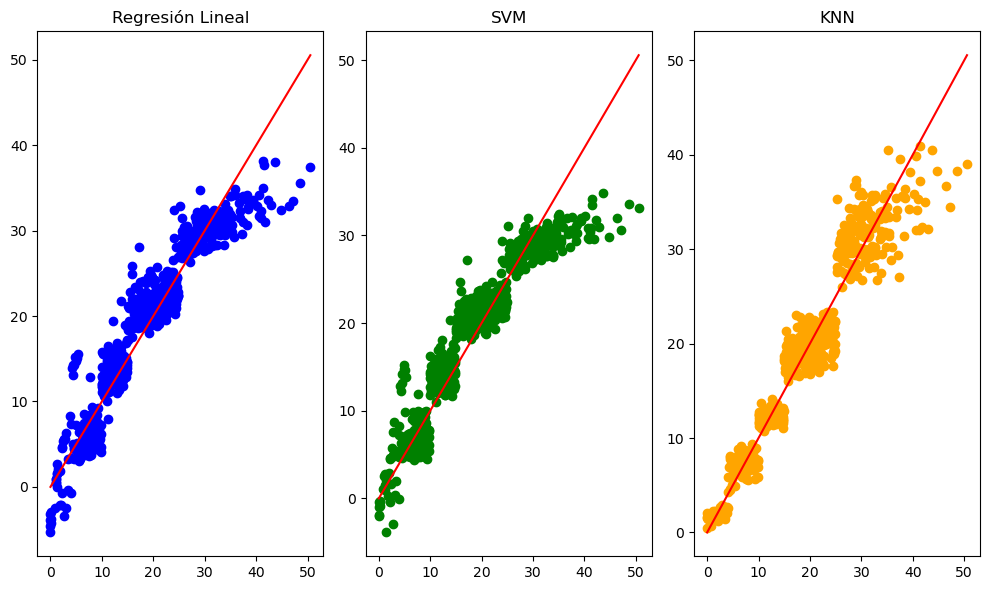

In [25]:
# Graficar las predicciones de los modelos
plt.figure(figsize=(10, 6))

# Gráfico de la regresión lineal
plt.subplot(131)
plt.scatter(y_test, y_pred_linear, color='blue')  # Cambié y_pred_reg por y_pred_linear
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Regresión Lineal')

# Gráfico de SVM
plt.subplot(132)
plt.scatter(y_test, y_pred_svm, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('SVM')

# Gráfico de KNN
plt.subplot(133)
plt.scatter(y_test, y_pred_knn, color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('KNN')

plt.tight_layout()
plt.show()

